### Секция импорта 

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# pickle
import pickle

### Загружаем данные

In [241]:
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    df = df.iloc[:, 1:]
    df.dropna(inplace=True)
    return df

In [242]:
source_data = load_data("./Ushakov_dataset.csv")

### Изучаем исходных данных

Шаг 1: Вывод общей информации о столбцах данных и их типах

In [243]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flow                      5455 non-null   object 
 1   max_interpacket_interval  5455 non-null   float64
 2   min_interpacket_interval  5455 non-null   float64
 3   avg_interpacket_interval  5455 non-null   float64
 4   sum_interpacket_interval  5455 non-null   float64
 5   max_packet_length         5455 non-null   float64
 6   min_packet_length         5455 non-null   float64
 7   avg_packet_length         5455 non-null   float64
 8   sum_packet_length         5455 non-null   float64
 9   mode_packet_length        5455 non-null   float64
 10  label                     5455 non-null   object 
dtypes: float64(9), object(2)
memory usage: 468.9+ KB


Пример данных из столбцов с не численным типом

In [244]:
print(source_data["Flow"][:10])
print(source_data["label"][:10])

0        86.241.11.224:443<-->13.0.93.207:55661
1      212.160.227.130:58659<-->50.7.153.224:53
2      88.240.122.111:6588<-->59.204.50.159:443
3       210.10.10.94:6119<-->208.132.152.54:443
4      98.10.31.138:58808<-->229.38.127.170:443
5       25.6.158.159:49706<-->56.119.238.38:443
6     191.140.116.51:52798<-->215.133.4.166:443
7      194.190.82.159:4206<-->83.10.137.233:443
8    140.167.66.112:57787<-->17.167.164.217:443
9     67.254.60.139:53841<-->173.211.29.148:443
Name: Flow, dtype: object
0       normal
1       normal
2       normal
3       normal
4       normal
5    malicious
6       normal
7       normal
8       normal
9       normal
Name: label, dtype: object


Шаг 2: Вывод общей информации о данных в столбцах

In [245]:
source_data.describe()

,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5.455000e+03,5455.000000
mean,20.830811,0.000029,1.401393,86.790250,1220.290587,55.311169,332.942095,3.147769e+05,216.848202
std,82.253871,0.000288,5.821807,471.445258,690.214452,16.643377,260.700493,3.195962e+06,434.615578
min,-7.669930,-0.000035,-0.533911,-48.223350,21.725973,52.108409,38.782872,-3.681138e+05,11.442082
25%,2.081499,-0.000005,0.096563,1.353794,593.757814,53.706823,132.234037,-4.971737e+04,47.749504
50%,8.162209,0.000002,0.479645,15.114180,1455.840706,54.076897,301.975802,2.153440e+04,57.674303
75%,17.453075,0.000009,1.120158,43.350537,1510.073390,54.531826,393.999886,9.361712e+04,70.509820
max,1568.313130,0.014647,332.473890,10408.435217,7332.505745,1242.794247,1707.430963,1.129063e+08,1547.884607


Шаг 3: Проверка пропусков данных

In [246]:
source_data.isnull().sum()

Flow                        0
max_interpacket_interval    0
min_interpacket_interval    0
avg_interpacket_interval    0
sum_interpacket_interval    0
max_packet_length           0
min_packet_length           0
avg_packet_length           0
sum_packet_length           0
mode_packet_length          0
label                       0
dtype: int64

Шаг 4: Построение распределения исходных данных

array([[<Axes: title={'center': 'max_interpacket_interval'}>,
        <Axes: title={'center': 'min_interpacket_interval'}>,
        <Axes: title={'center': 'avg_interpacket_interval'}>],
       [<Axes: title={'center': 'sum_interpacket_interval'}>,
        <Axes: title={'center': 'max_packet_length'}>,
        <Axes: title={'center': 'min_packet_length'}>],
       [<Axes: title={'center': 'avg_packet_length'}>,
        <Axes: title={'center': 'sum_packet_length'}>,
        <Axes: title={'center': 'mode_packet_length'}>]], dtype=object)

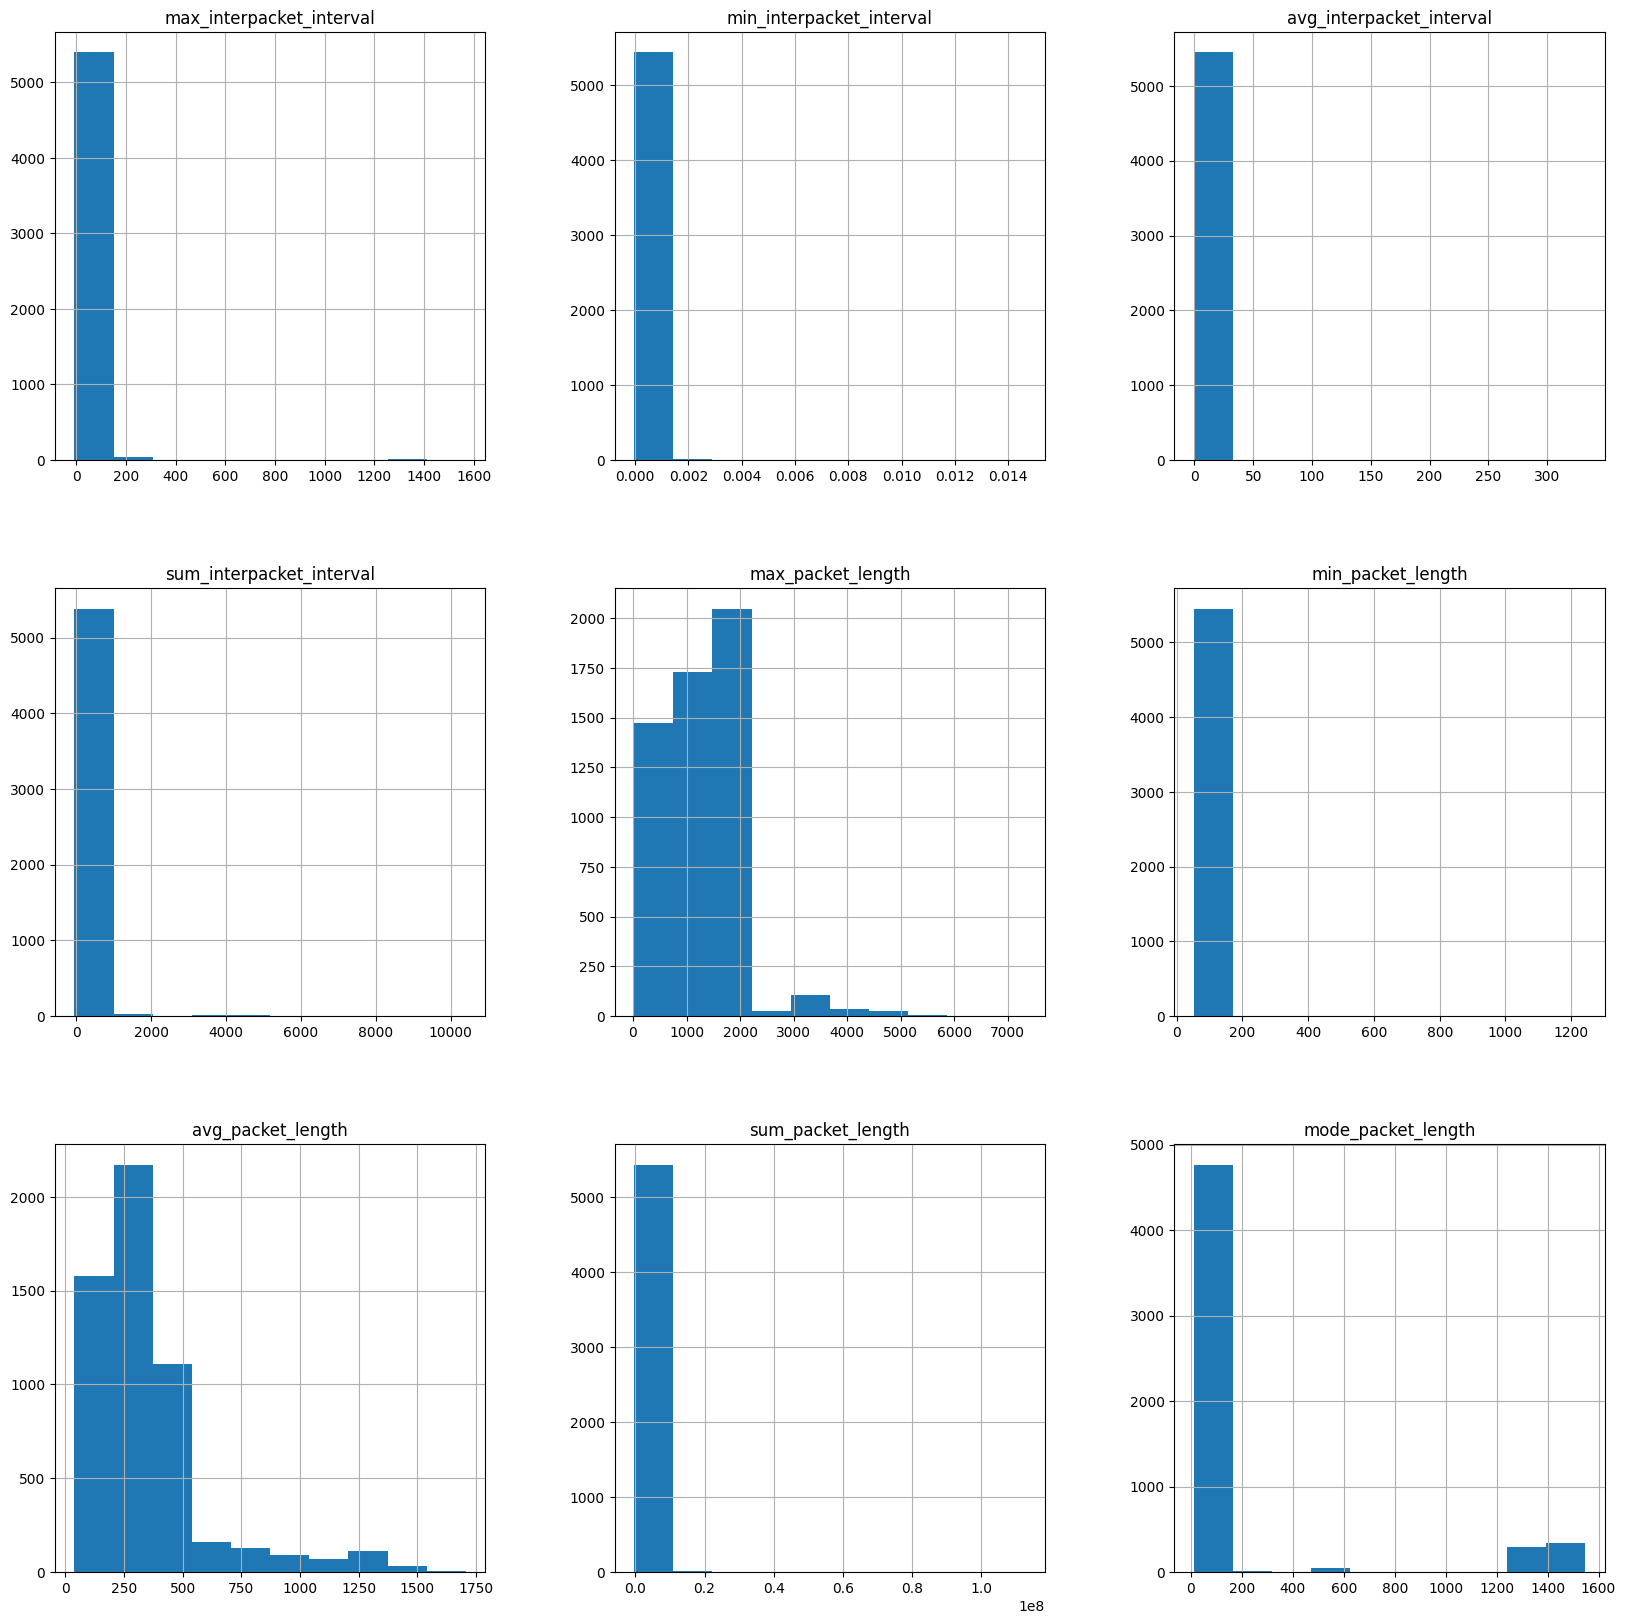

In [247]:
source_data.hist(figsize=(20,20))

Шаг 5: Построение boxplot

<Axes: >

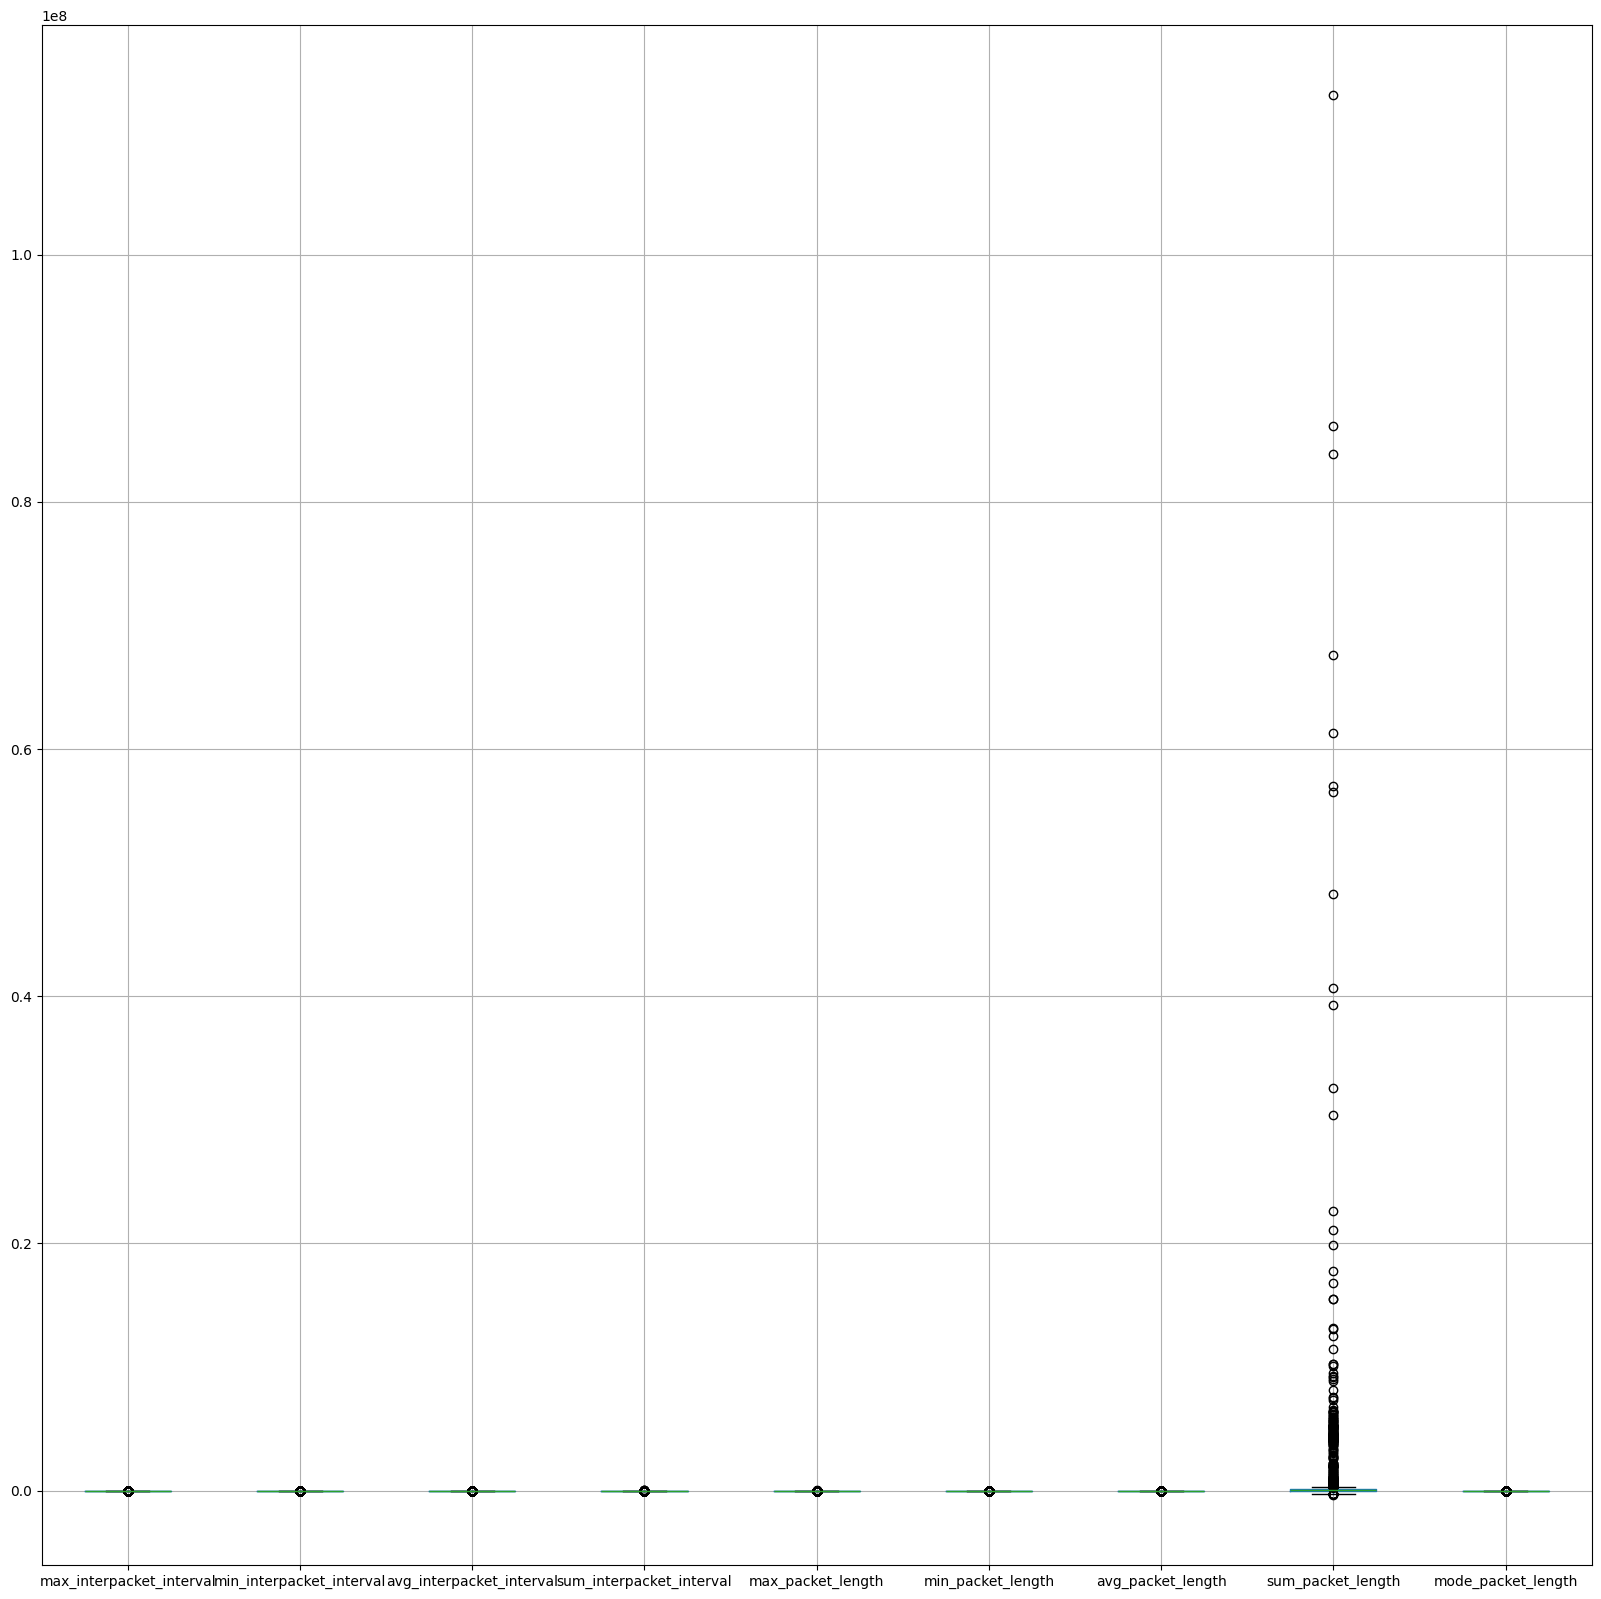

In [248]:
source_data.boxplot(figsize=(20,20))

Шаг 6: Построение матрицы корреляции

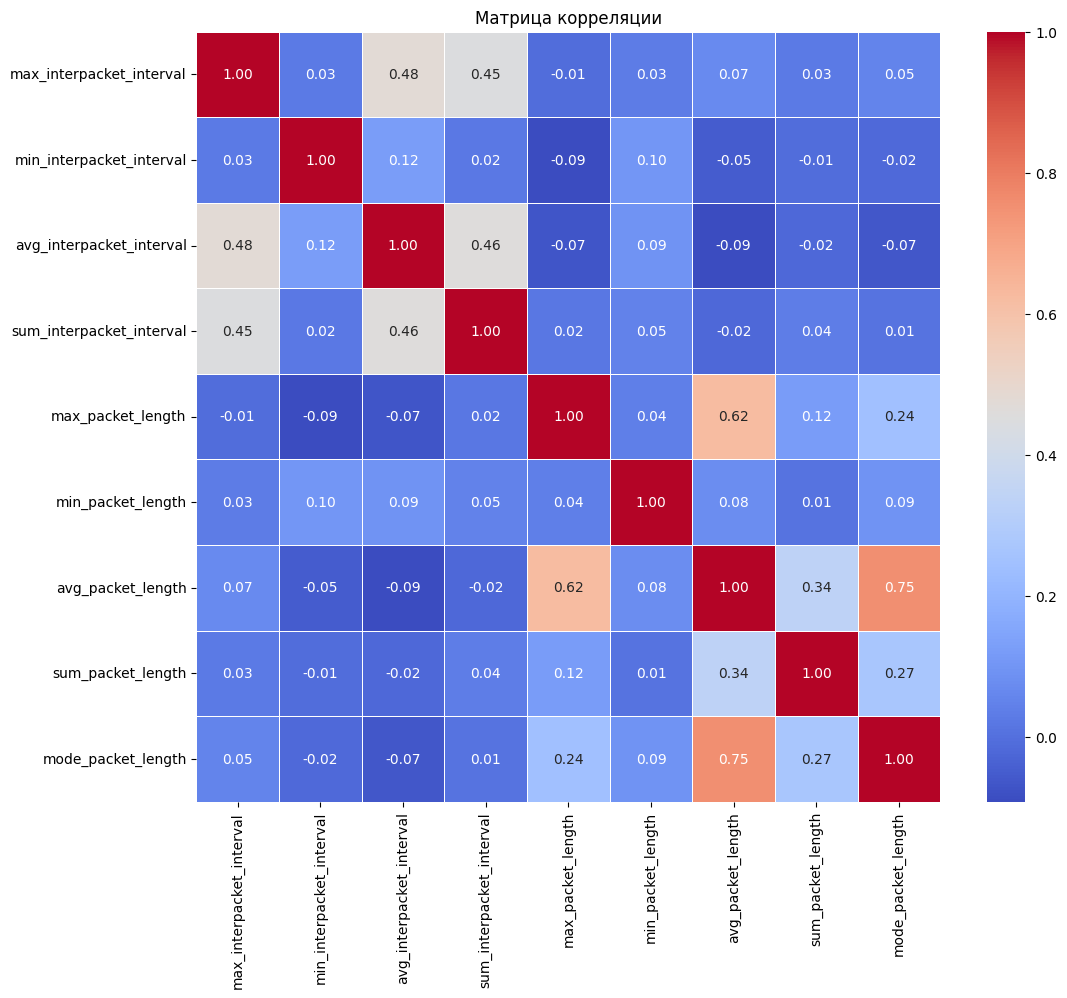

In [249]:
def plot_corr_matrix(df):
    # Построение матрицы корреляции
    correlation_matrix = df[df.select_dtypes(include=["number"]).columns].corr()

    # Визуализация матрицы корреляции
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Матрица корреляции")
    plt.show()

plot_corr_matrix(source_data)

Шаг 7: Определение соотношения классов в исходном наборе данных.

In [250]:
# in percent
source_data["label"].value_counts(normalize=True) * 100

label
normal       89.84418
malicious    10.15582
Name: proportion, dtype: float64

Шаг 8: Подведите итог исследования исходного набора данных

1. В DataFrame содержится 11 столбцов и 5455 записи. В 9 столбцах содержатся числовые данные, в 2 - строковые. Столбец `Flow` содержит данные о двух сторонах установленного соединения (в виде IP1:Port1<-->IP2:Port2), столбец `label` - метки классов трафика: **normal** или **malicious**.
2. Пропусков данных ни в одном из столбцов не наблюдается.
3. Согласно графику boxplot в столбце `sum_packet_length` есть выборсы. Однако, как покажет ниже исследования фильтрации данных, при попытке их устранить мы сильно теряем данные о malicious трафике.
4. По графикам распределения данных видно, что данные в разных столбцах имеют разный маштаб и разное распределение.
5. Судя по матрице корреляции между рядом столбцов: например `avg_packet_length` и `max_packet_length` есть (возможно, что есть) достаточно сильная корреляция. С одной стороны она кажется естественной, с другой стороны встает вопрос, что может быть некоторые столбцы следует исключить из набора данных.
6. Классы normal или malicious не сбалансированы. Для их балансировки мы можем использовать один из стандартных для этого подходов.
7. Для обучения модели мы будем использовать данные из числовых столбцов, в качестве целевой переменной - данные из столбца `label` (после его кодировки).

### Фильтрация данных

Определяем функции для фильтрации данных:

In [251]:
def remove_outliers_quartile(df):
    for column in df.select_dtypes(include=["number"]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=["number"])))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

Проверяем, как сильно каждая из функций фильтрации влияет на данные:

In [252]:
filtered_check1 = remove_outliers_quartile(source_data)
print(len(filtered_check1))
print(filtered_check1["label"].value_counts(normalize=True) * 100)
filtered_check2 = remove_outliers_zscore(source_data)
print(len(filtered_check2))
print(filtered_check2["label"].value_counts(normalize=True) * 100)

3040
label
normal       97.401316
malicious     2.598684
Name: proportion, dtype: float64
5127
label
normal       90.6378
malicious     9.3622
Name: proportion, dtype: float64


Из сравнений этих 2 функций фильтрации видно следующее:
1. Функция `remove_outliers_quartile` работает достаточно агрессивно: из 5455 записей она оставила 3040. При этом пропорции классов из 89.8% (для **normal** трафика) и 10.2% (для **malicious** трафика) превратились в 97.4% (для **normal** трафика) и 2.6% (для **malicious** трафика).
2. Функция `remove_outliers_zscore` работает достаточно мягко: из 5455 записей она оставила 5127. При этом пропорции классов из 89.8% (для **normal** трафика) и 10.2% (для **malicious** трафика) превратились в 90.6% (для **normal** трафика) и 9.4% (для **malicious** трафика).

Кажется, что применение функции `remove_outliers_quartile` для фильтрации удалит нам практически всю информацию об **malicious** трафике. Поэтому попробуем использовать только функцию `remove_outliers_zscore` для фильтрации

In [253]:
filtered_data = remove_outliers_zscore(source_data)

Строим boxplot полученного нового DataFrame после фильтрации

<Axes: >

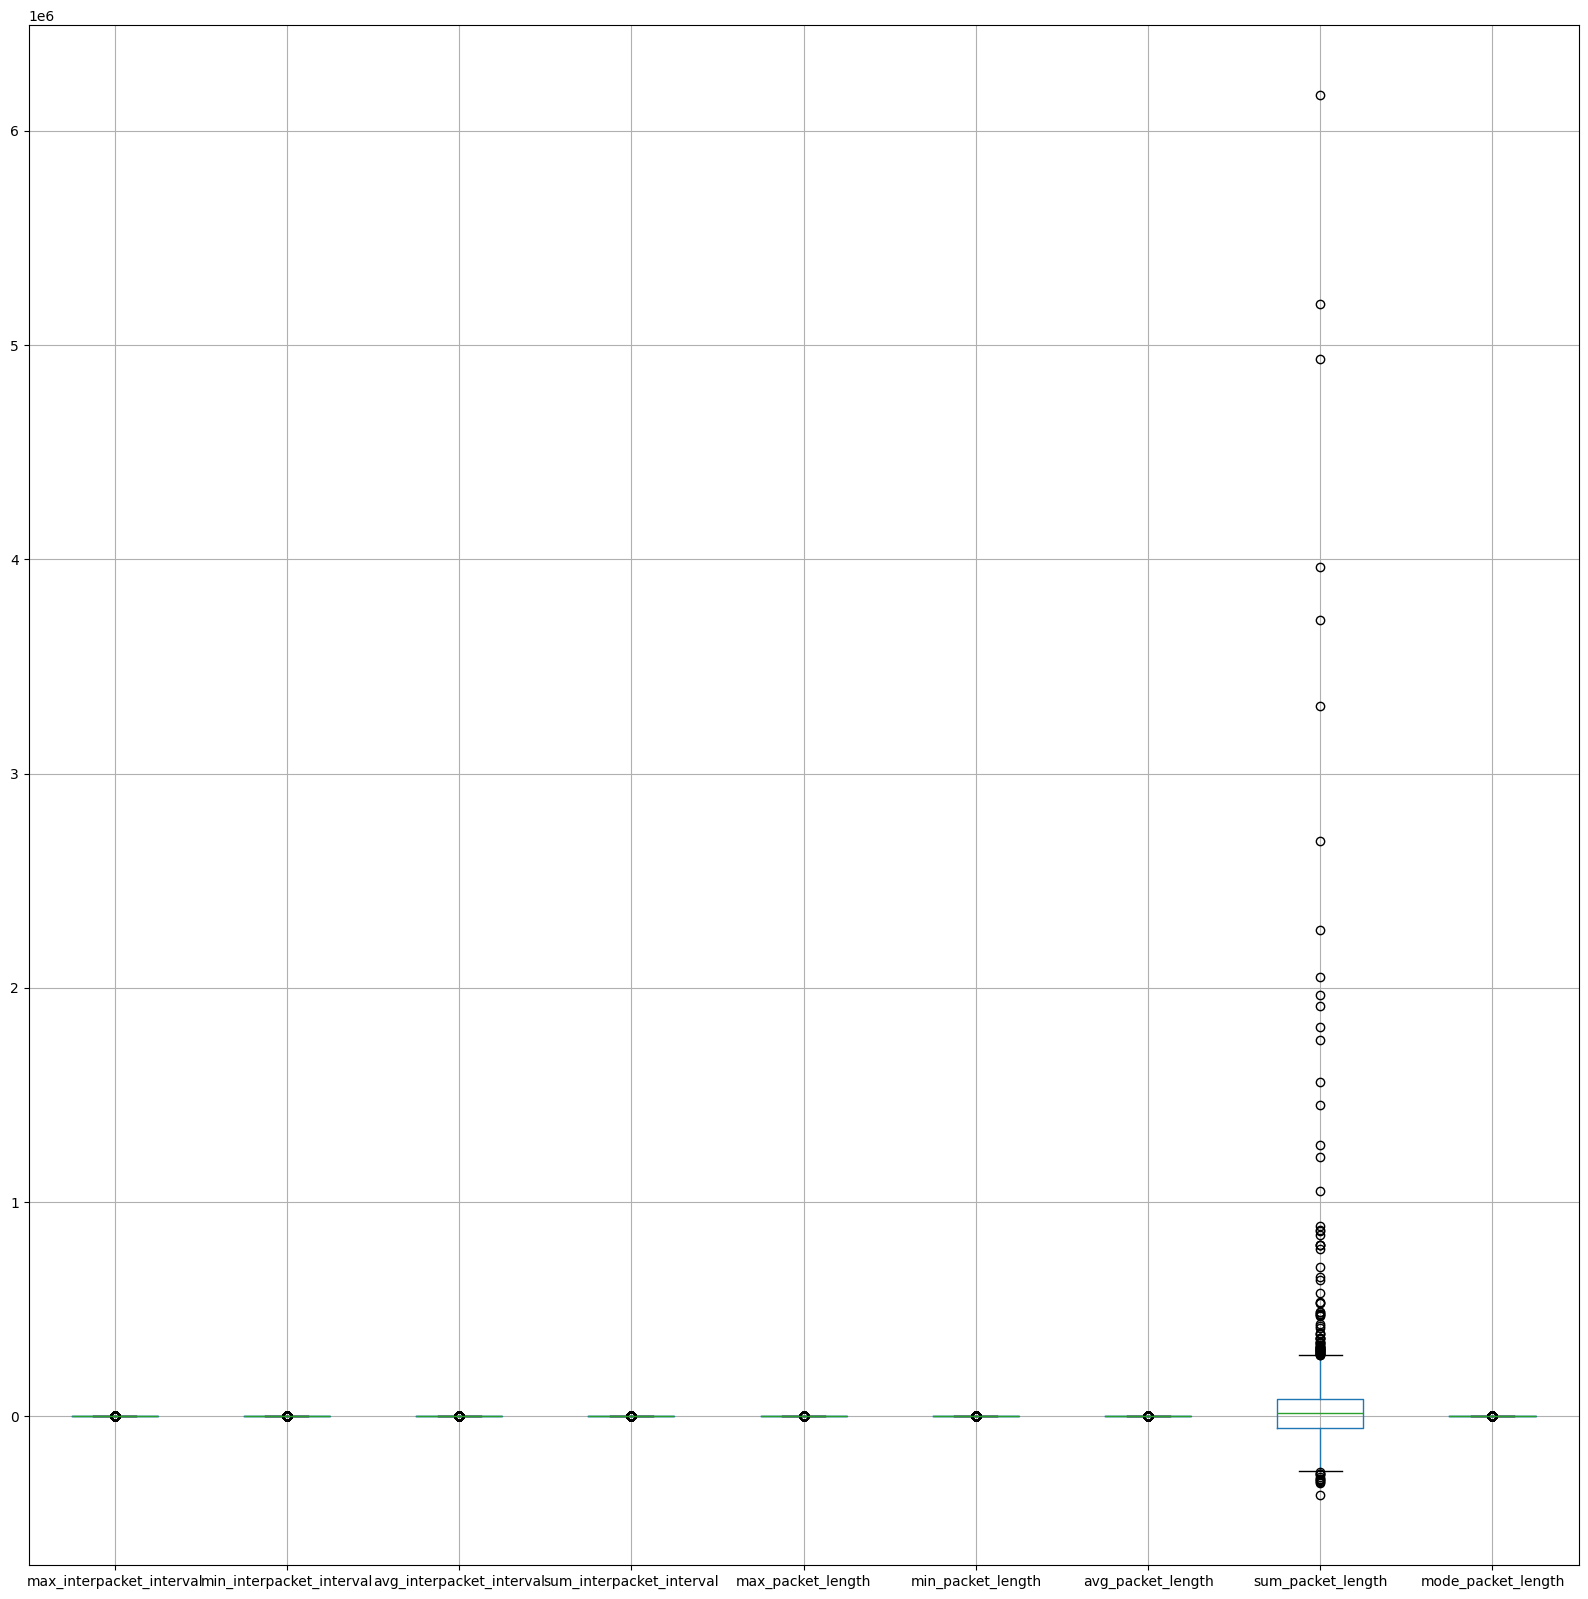

In [254]:
filtered_data.boxplot(figsize=(20,20))

### Преобразование данных

У нас наблюдается следующий дисбаланс в данных между классами трафика normal и malicious:

In [255]:
filtered_data["label"].value_counts(normalize=True) * 100

label
normal       90.6378
malicious     9.3622
Name: proportion, dtype: float64

Давайте сбалансируем данные с помощью random oversampling:

In [256]:
normal_count = filtered_data["label"].value_counts()["normal"]
malicious_count = filtered_data["label"].value_counts()["malicious"]
malicious_data = filtered_data.loc[filtered_data["label"] == "malicious"]
disbalance_count = normal_count - malicious_count
for _ in range(normal_count - malicious_count):
    filtered_data = pd.concat([filtered_data, malicious_data.sample(n=1, random_state=None)], ignore_index=True)
filtered_data["label"].value_counts(normalize=True) * 100

label
normal       50.0
malicious    50.0
Name: proportion, dtype: float64

Осуществим преобразование данных с помощью `StandardScaler` и `PowerTransformer`:

In [257]:

x_source = filtered_data.select_dtypes(include=["number"])
power_transformer = PowerTransformer(method="yeo-johnson")
standard_scaler = StandardScaler()
x_transformed = standard_scaler.fit_transform(power_transformer.fit_transform(x_source))
x_prepared = pd.DataFrame(x_transformed, columns=x_source.columns)

Для кодировки значений в столбце `label` я буду использовать `LabelEncoder`:

In [258]:
label_encoder = LabelEncoder()
label_encoder.fit(["normal", "malicious"])
y_source = filtered_data["label"]
y_prepared = label_encoder.fit_transform(y_source)

Строим распределение данных после преобразования

array([[<Axes: title={'center': 'max_interpacket_interval'}>,
        <Axes: title={'center': 'min_interpacket_interval'}>,
        <Axes: title={'center': 'avg_interpacket_interval'}>],
       [<Axes: title={'center': 'sum_interpacket_interval'}>,
        <Axes: title={'center': 'max_packet_length'}>,
        <Axes: title={'center': 'min_packet_length'}>],
       [<Axes: title={'center': 'avg_packet_length'}>,
        <Axes: title={'center': 'sum_packet_length'}>,
        <Axes: title={'center': 'mode_packet_length'}>]], dtype=object)

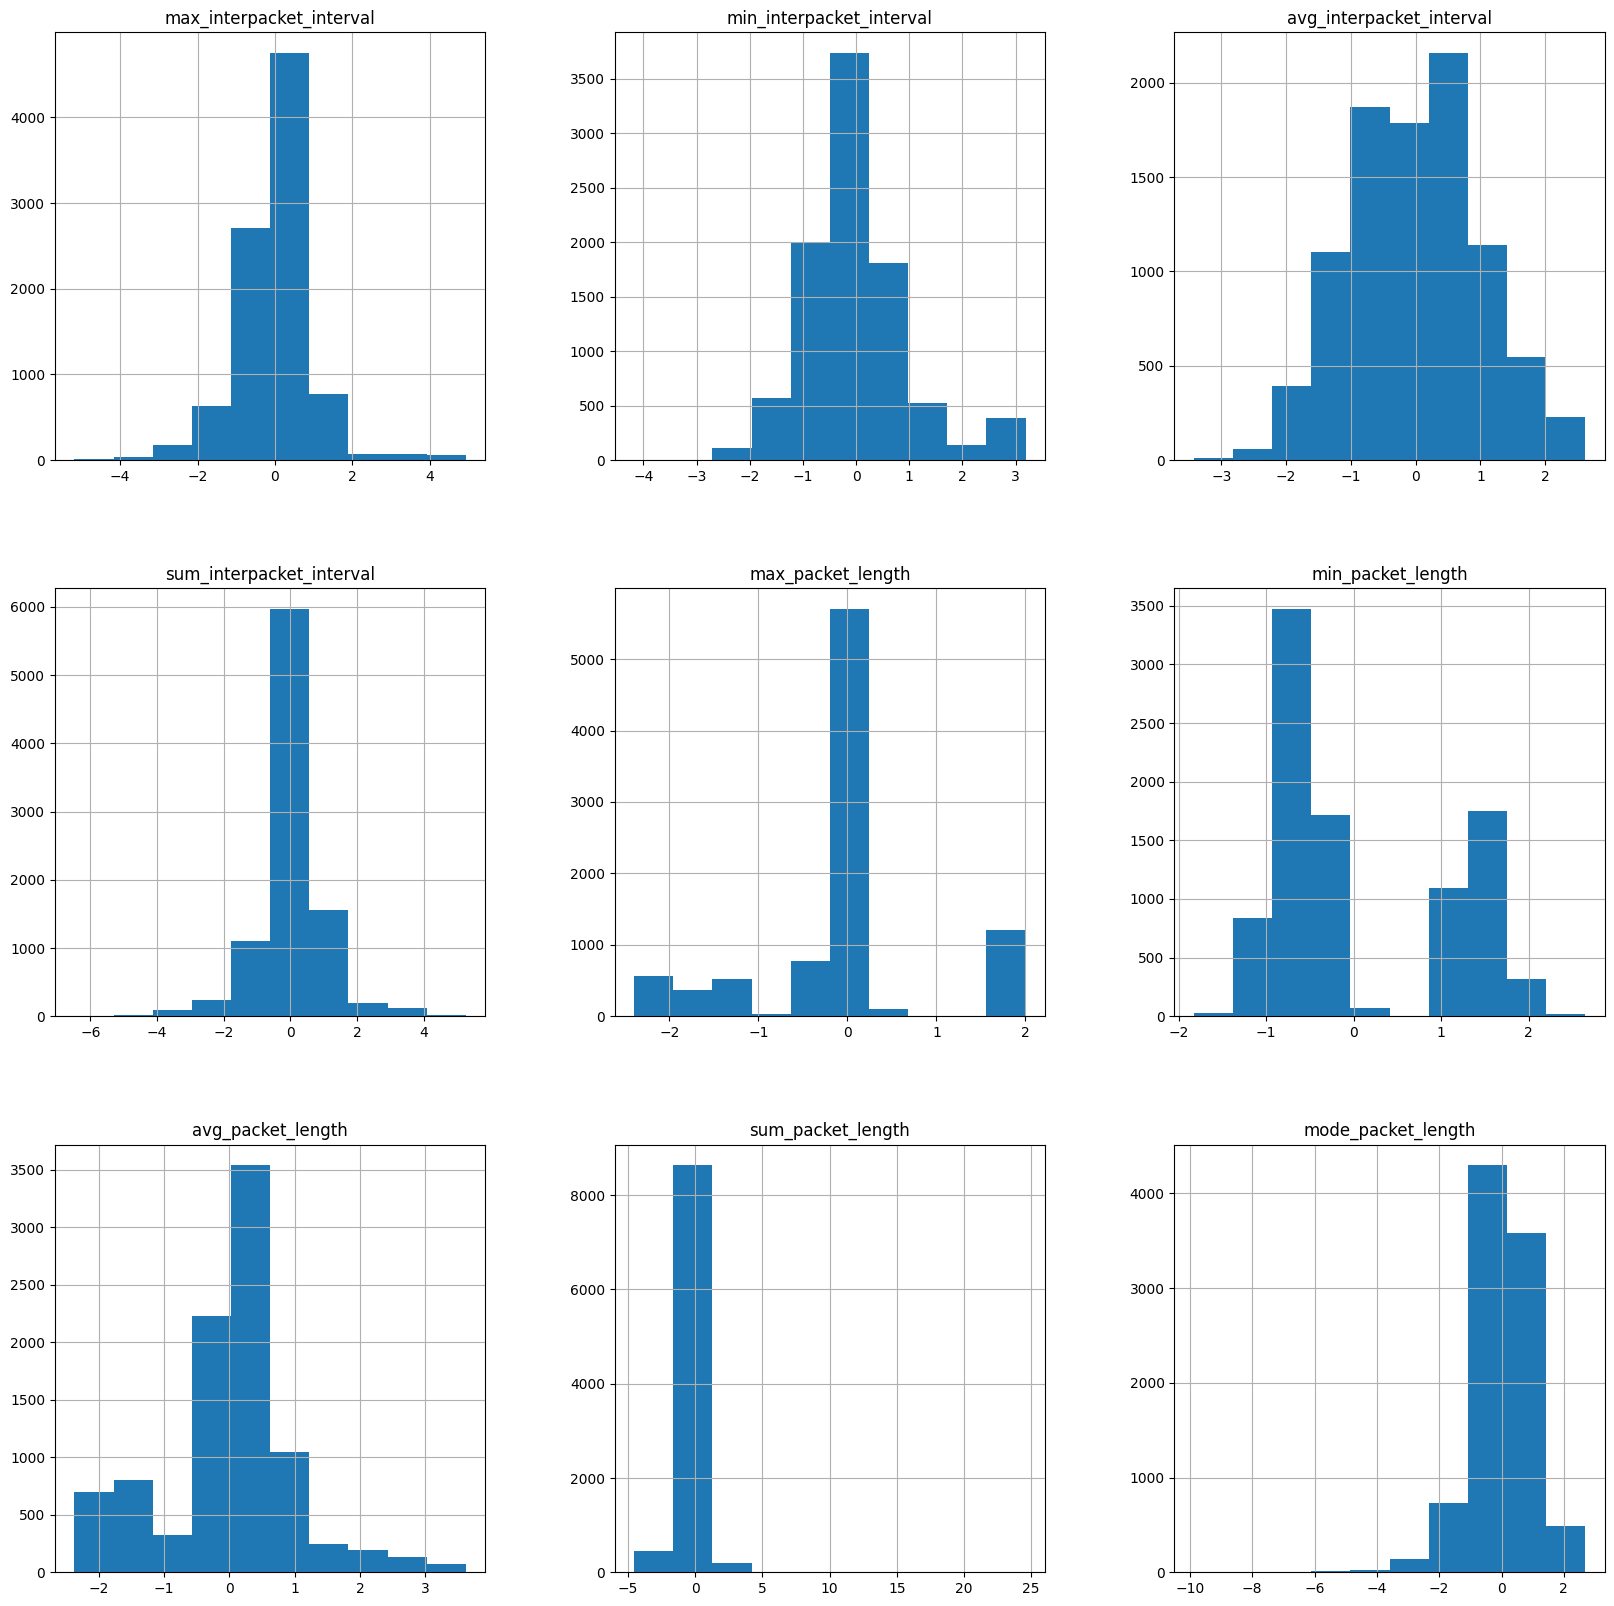

In [259]:
x_prepared.hist(figsize=(20,20))

### Обучение модели RandomForest

In [260]:
def cross_validation(clf, X, y):
    """
    Выполняет кросс-валидацию для модели RandomForest и возвращает результаты точности на каждом этапе,
    а также наилучшую обученную модель с максимальной точностью.

    Параметры:
    - clf (Модель классификации, например, RandomForest)
    - X (DataFrame или массив): Признаки (features) набора данных.
    - y (Series или массив): Метки классов (targets) набора данных.

    Возвращает:
    - accuracy_scores(list): Массив точностей на каждом фолде.
    - best_сlf  (тип исходной модели): Наилучший экземпляр полученный на кросс-валидации
    """
    skf = StratifiedKFold(n_splits=3)
    accuracy_scores = []
    clfs = []
    for train, test in skf.split(X, y):
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        clfs.append(clf)
    return accuracy_scores, clfs[max(enumerate(accuracy_scores),key=lambda x: x[1])[0]]

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
scores, best_model = cross_validation(random_forest, x_transformed, y_prepared)
print(scores)

[0.9967721110393802, 0.9977404777275661, 0.9958037443511943]


### Предсказание модели на тестовом датасете

In [261]:
test_data = load_data("./validate.csv")
test_source = test_data.select_dtypes(include=["number"])
test_transformed = standard_scaler.fit_transform(power_transformer.fit_transform(test_source))
prediction = best_model.predict(test_transformed)

Формируем данные для kaggle

In [262]:
test_labels = label_encoder.inverse_transform(prediction)
test_datafarme = pd.DataFrame(data=test_labels).reset_index(names=["ID"])
test_datafarme.columns = ["ID","TARGET"]
test_datafarme.to_csv("./submission_Ushakov.csv", index=False, sep=",")
print(test_datafarme.head())

   ID     TARGET
0   0  malicious
1   1  malicious
2   2  malicious
3   3     normal
4   4  malicious


Мои результат на kaggle:

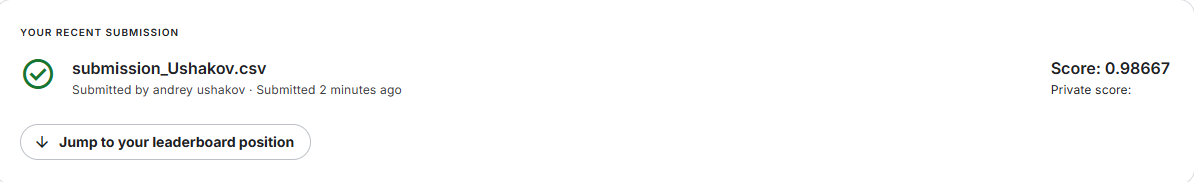

### Сохраняю dump модели

In [263]:
with open(r"./Ushakov_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

Выводы:
1. Нам хватило данных из числовых столбцов, фильтрации только с помощью метода `remove_outliers_zscore` и преобразования данных с помощью `StandardScaler` и `PowerTransformer` для построения модели, которая достаточно хорошо предсказанывает тип трафика (результат на kaggle 0.98667). Конечно, для получения такого результата мы избавились от дисбаланса классов при обучении с помощью random oversampling подхода.
2. Мы не использовали столбец `Flow` с данными об IP адресах и портах установленных соединений между двумя точками. С одной стороны кажется, что этот данные из этого столбца должны достаточно сильно влиять на результат. С другой стороны, проверка на валидационном наборе данных показывает, что данные оттуда нам вроде как не очень то и нужны. Тем не менее - поисследовать влияние данных из этого столбца на результат следует (для этого - данные из этого столбца следует разбить на 4 порции и IP адреса преобразовать в 32-битные числа).